<a href="https://colab.research.google.com/github/danielramo27s/UDEA-ai4eng-20242/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos el archivo kaggle.json para tener acceso a la competencia de kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danielramos27","key":"68ee7434e74c3a6f858f223a903a33a4"}'}

Configuramos los permisos y descargamos los archivos

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

!chmod 600 /content/kaggle.json

descargamos los archivos directamente desde kaggle

In [4]:
!kaggle competitions download -c udea-ai4eng-20242

 75% 15.0M/20.1M [00:00<00:00, 57.1MB/s]
100% 20.1M/20.1M [00:00<00:00, 63.5MB/s]


descomprimimos el archivo zip

In [5]:
import zipfile

# Descomprime el archivo
with zipfile.ZipFile("/content/udea-ai4eng-20242.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/udea-ai4eng-20242")

istamos los archivos descomprimidos

In [6]:
print(os.listdir('/content/udea-ai4eng-20242'))

['train.csv', 'submission_example.csv', 'test.csv']


con panda cargamos el archivo train.csv y con df.head visualizamos las primeras filas para poder ver las categorias

In [7]:
import pandas as pd

df = pd.read_csv('/content/udea-ai4eng-20242/train.csv')

# Muestra las primeras filas del DataFrame
from IPython.display import display

display(df.head())

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Verificamos la cantidad de valores nulos en cada columna

In [8]:
df.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


Visualizar los datos faltantes con un mapa de calor

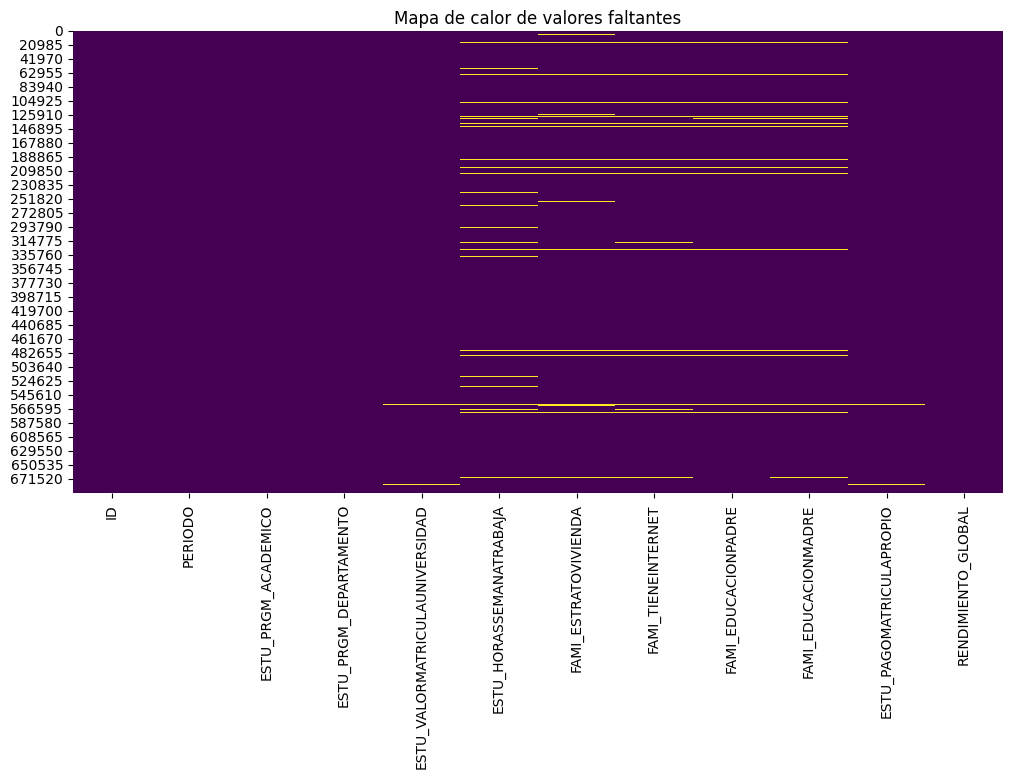

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()


seguimos visualizando los datos faltantes pero ahora con Gráfico de Barras de Valores Faltantes

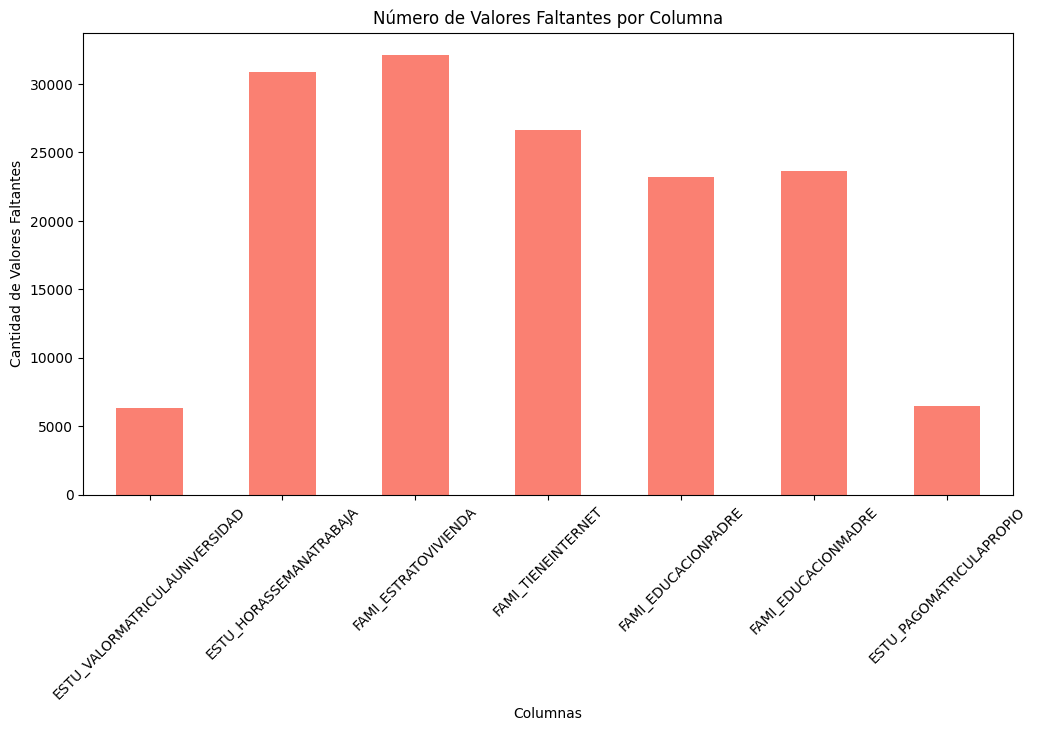

In [11]:
# Contamos valores nulos por columna
missing_counts = df.isnull().sum()

# Creamos un gráfico de barras
plt.figure(figsize=(12, 6))
missing_counts[missing_counts > 0].plot(kind='bar', color='salmon')
plt.title('Número de Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Faltantes')
plt.xticks(rotation=45)
plt.show()


Analizamos la distribución de las variables en este caso ESTU_HORASSEMASTRABAJA para entender si es razonable imputar valores faltantes o si hay un sesgo que debemos tenerse en cuenta.

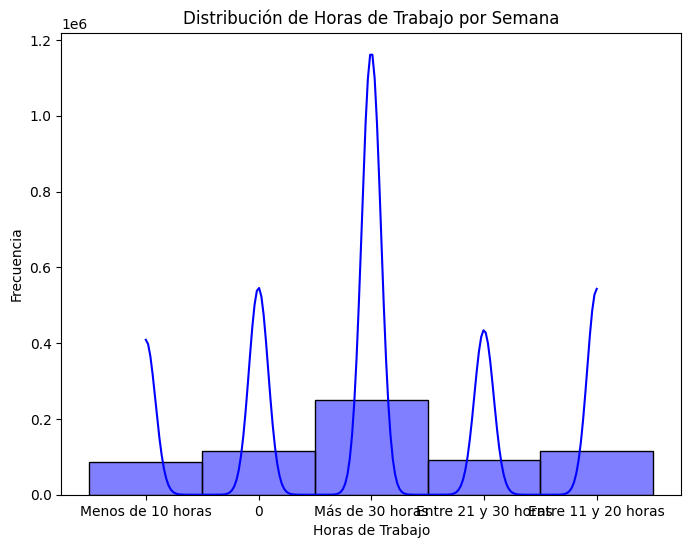

In [12]:
# Visualizamos la distribución de una columna numérica
plt.figure(figsize=(8, 6))
sns.histplot(df['ESTU_HORASSEMANATRABAJA'], bins=30, kde=True, color='blue')
plt.title('Distribución de Horas de Trabajo por Semana')
plt.xlabel('Horas de Trabajo')
plt.ylabel('Frecuencia')
plt.show()


 haremos un Boxplots para Identificar Valores Atípicos

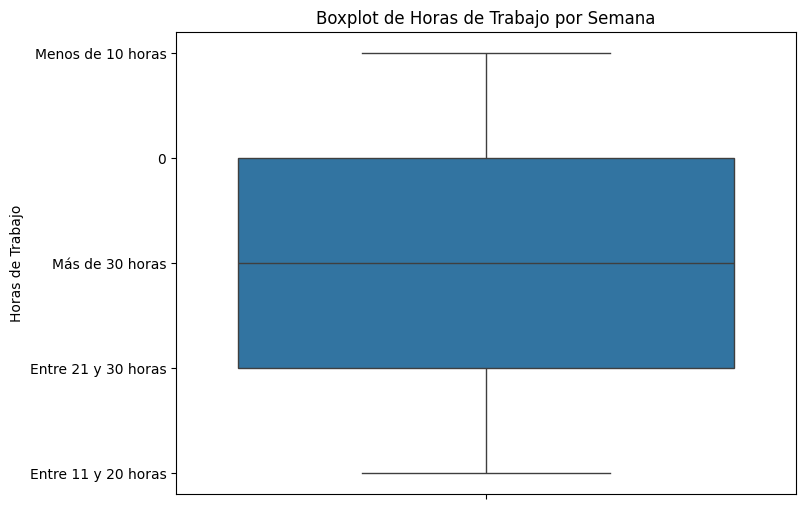

In [13]:
# Boxplot para la columna numérica
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='ESTU_HORASSEMANATRABAJA')
plt.title('Boxplot de Horas de Trabajo por Semana')
plt.ylabel('Horas de Trabajo')
plt.show()


 haremos una Relación entre Variables y Valores Faltantes

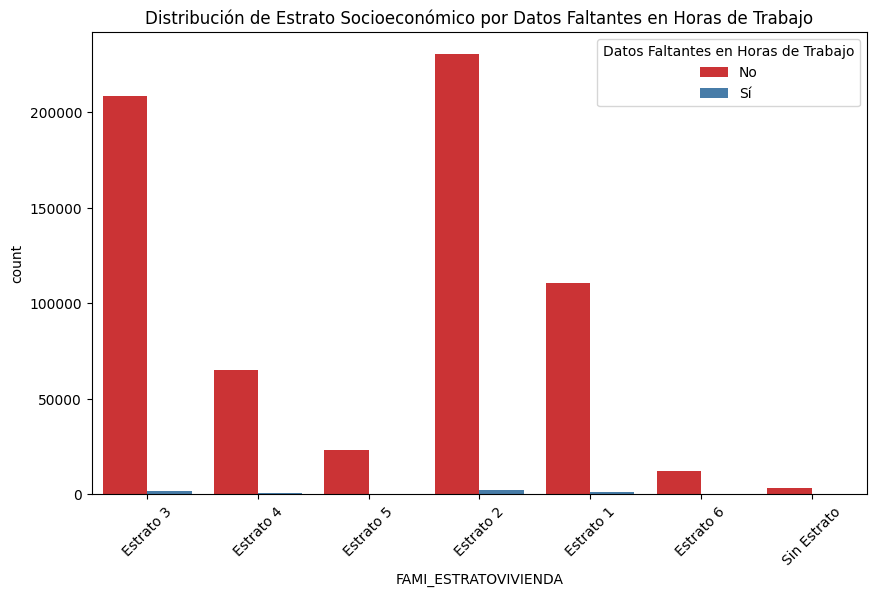

In [14]:
# Comparamos distribución de otra variable respecto a una con valores faltantes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FAMI_ESTRATOVIVIENDA', hue=df['ESTU_HORASSEMANATRABAJA'].isnull(), palette='Set1')
plt.title('Distribución de Estrato Socioeconómico por Datos Faltantes en Horas de Trabajo')
plt.xticks(rotation=45)
plt.legend(title='Datos Faltantes en Horas de Trabajo', labels=['No', 'Sí'])
plt.show()


luego de analizar los valores faltantes, se van a imputar los valores con valores de la moda

In [15]:
# Imputar valores faltantes en 'ESTU_VALORMATRICULAUNIVERSIDAD' con la moda
df['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(df['ESTU_VALORMATRICULAUNIVERSIDAD'].mode()[0], inplace=True)

# Imputar valores faltantes en 'ESTU_HORASSEMANATRABAJA' con la moda
df['ESTU_HORASSEMANATRABAJA'].fillna(df['ESTU_HORASSEMANATRABAJA'].mode()[0], inplace=True)

# Imputar valores faltantes en 'FAMI_ESTRATOVIVIENDA' con la moda
df['FAMI_ESTRATOVIVIENDA'].fillna(df['FAMI_ESTRATOVIVIENDA'].mode()[0], inplace=True)

# Imputar valores faltantes en 'FAMI_TIENEINTERNET' con la moda
df['FAMI_TIENEINTERNET'].fillna(df['FAMI_TIENEINTERNET'].mode()[0], inplace=True)

# Imputar valores faltantes en 'FAMI_EDUCACIONPADRE' con la moda
df['FAMI_EDUCACIONPADRE'].fillna(df['FAMI_EDUCACIONPADRE'].mode()[0], inplace=True)

# Imputar valores faltantes en 'FAMI_EDUCACIONMADRE' con la moda
df['FAMI_EDUCACIONMADRE'].fillna(df['FAMI_EDUCACIONMADRE'].mode()[0], inplace=True)

# Imputar valores faltantes en 'ESTU_PAGOMATRICULAPROPIO' con la moda
df['ESTU_PAGOMATRICULAPROPIO'].fillna(df['ESTU_PAGOMATRICULAPROPIO'].mode()[0], inplace=True)


Codificamos las variables categóricas con One-Hot Encoding

In [16]:
# Codificación one-hot para variables categóricas
df = pd.get_dummies(df, columns=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'FAMI_ESTRATOVIVIENDA'], drop_first=True)


Codificación ordinal para RENDIMIENTO_GLOBAL

In [17]:
# Codificación ordinal para 'RENDIMIENTO_GLOBAL'
rendimiento_mapping = {'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3}
df['RENDIMIENTO_GLOBAL'] = df['RENDIMIENTO_GLOBAL'].map(rendimiento_mapping)


Verificar los datos después del preprocesamiento

In [18]:
# Verificar las primeras filas después del preprocesamiento
df.head()

# Verificar si quedan valores nulos
df.isnull().sum()


,0
ID,0
PERIODO,0
ESTU_VALORMATRICULAUNIVERSIDAD,0
ESTU_HORASSEMANATRABAJA,0
FAMI_TIENEINTERNET,0
...,...
FAMI_ESTRATOVIVIENDA_Estrato 3,0
FAMI_ESTRATOVIVIENDA_Estrato 4,0
FAMI_ESTRATOVIVIENDA_Estrato 5,0
FAMI_ESTRATOVIVIENDA_Estrato 6,0


In [20]:
import pandas as pd

# Supongamos que 'df' es tu DataFrame preprocesado
df.to_csv('dataset_preprocesado.csv', index=False)




In [22]:
from google.colab import files
files.download('dataset_preprocesado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# Muestra las primeras filas del DataFrame
from IPython.display import display

display(df.head())

,ID,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,...,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato
0,904256,20212,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Si,Técnica o tecnológica incompleta,Postgrado,No,2,False,...,False,False,False,False,False,True,False,False,False,False
1,645256,20212,Entre 2.5 millones y menos de 4 millones,0,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0,False,...,False,False,False,False,False,True,False,False,False,False
2,308367,20203,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0,False,...,False,False,False,False,False,True,False,False,False,False
3,470353,20195,Entre 4 millones y menos de 5.5 millones,0,Si,No sabe,Secundaria (Bachillerato) completa,No,3,False,...,False,False,False,False,False,False,True,False,False,False
4,989032,20212,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Si,Primaria completa,Primaria completa,No,1,False,...,False,False,False,False,False,True,False,False,False,False


entrenamiento del modelo

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Suponiendo que 'X' son tus características e 'y' es la columna 'RENDIMIENTO_GLOBAL'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de bosque aleatorio
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


NameError: name 'X' is not defined